# Evaluate

Can seasonal forecasts be used as 'alternate' realities? Here we show how a set of evaluation metrics can be used to answer this question. The evaluation metrics are available through an [R package](https://github.com/timokelder/UNSEEN) for easy evaluation of the UNSEEN ensemble. Here, we illustrate how this package can be used in the UNSEEN workflow.  We will evaluate the generated UNSEEN ensemble of UK February precipitation and of MAM Siberian heatwaves. 

<div class="alert alert-info">

Note

This is R code and not python!
    
We switch to R since we believe R has a better functionality in extreme value statistics. 

</div>

We load the UNSEEN package and read in the data.

In [1]:
setwd('../../..')
getwd()

[1] "C:/Users/Timo/OneDrive - Loughborough University/GitHub/UNSEEN-open"

In [2]:
library(UNSEEN)

The data that is imported here are the files stored at the end of the [preprocessing step](../2.Preprocess/2.Preprocess.ipynb).


In [3]:
SEAS5_Siberia_events <- read.csv("Data/SEAS5_Siberia_events.csv", stringsAsFactors=FALSE)
ERA5_Siberia_events <- read.csv("Data/ERA5_Siberia_events.csv", stringsAsFactors=FALSE)

In [4]:
SEAS5_Siberia_events_zoomed <- read.csv("Data/SEAS5_Siberia_events_zoomed.csv", stringsAsFactors=FALSE)
ERA5_Siberia_events_zoomed <- read.csv("Data/ERA5_Siberia_events_zoomed.csv", stringsAsFactors=FALSE)

In [5]:
SEAS5_Siberia_events$t2m <- SEAS5_Siberia_events$t2m - 273.15
ERA5_Siberia_events$t2m <- ERA5_Siberia_events$t2m - 273.15
SEAS5_Siberia_events_zoomed$t2m <- SEAS5_Siberia_events_zoomed$t2m - 273.15
ERA5_Siberia_events_zoomed$t2m <- ERA5_Siberia_events_zoomed$t2m - 273.15

In [6]:
head(SEAS5_Siberia_events_zoomed,n = 3)
head(ERA5_Siberia_events, n = 3)

,year,leadtime,number,t2m
,<int>,<int>,<int>,<dbl>
1,1982,2,0,-3.736505
2,1982,2,1,-5.682759
3,1982,2,2,-4.221411


,year,t2m
,<int>,<dbl>
1,1979,4.010750
2,1980,3.880965
3,1981,4.822891


In [7]:
EOBS_UK_weighted_df <- read.csv("Data/EOBS_UK_weighted_upscaled.csv", stringsAsFactors=FALSE)
SEAS5_UK_weighted_df <- read.csv("Data/SEAS5_UK_weighted_masked.csv", stringsAsFactors=FALSE)

And then convert the time class to Date format, with the ymd function in lubridate:

In [37]:
EOBS_UK_weighted_df$time <- lubridate::ymd(EOBS_UK_weighted_df$time)
str(EOBS_UK_weighted_df)

EOBS_UK_weighted_df_hindast <- EOBS_UK_weighted_df[
    EOBS_UK_weighted_df$time > '1982-02-01' &
    EOBS_UK_weighted_df$time < '2017-02-01',
    ]


SEAS5_UK_weighted_df$time <- lubridate::ymd(SEAS5_UK_weighted_df$time)
str(SEAS5_UK_weighted_df)

'data.frame':	71 obs. of  2 variables:
 $ time: Date, format: "1950-02-28" "1951-02-28" ...
 $ rr  : num  4.13 3.25 1.07 1.59 2.59 ...
'data.frame':	4375 obs. of  4 variables:
 $ leadtime: int  2 2 2 2 2 2 2 2 2 2 ...
 $ number  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ time    : Date, format: "1982-02-01" "1983-02-01" ...
 $ tprate  : num  1.62 2.93 3.27 2 3.31 ...


## Timeseries

Here we plot the timeseries of SEAS5 (UNSEEN) and ERA5 (OBS) for the entire domain and a zoomed domain for the Siberian Heatwave. 

Warning message:
"Removed 2756 rows containing non-finite values (stat_boxplot)."


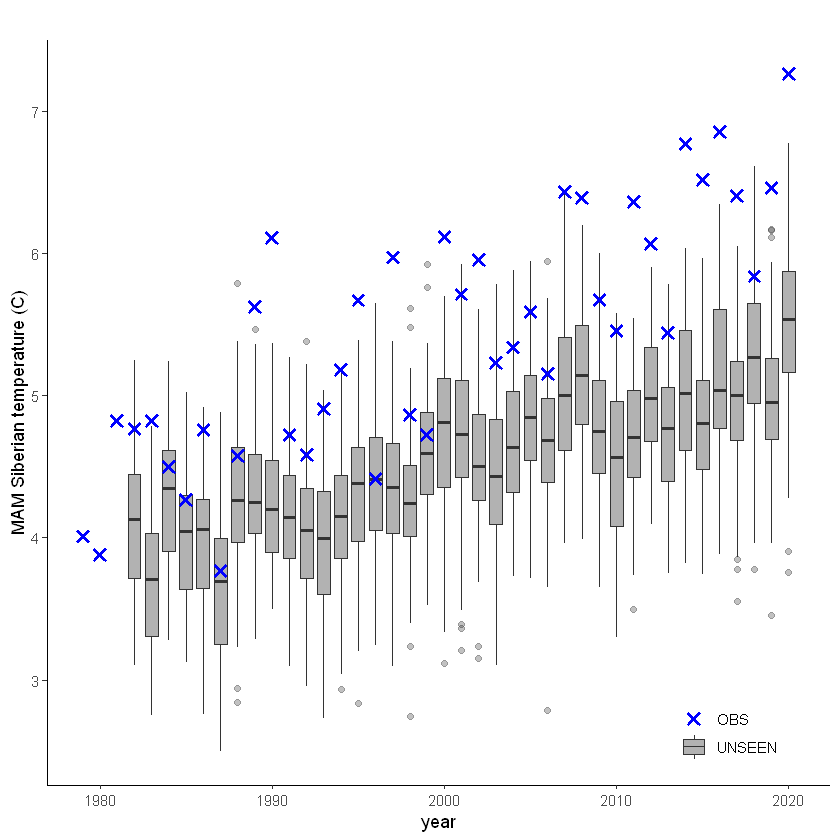

In [9]:
unseen_timeseries(
    ensemble = SEAS5_Siberia_events,
    obs = ERA5_Siberia_events,
    ensemble_yname = "t2m",
    ensemble_xname = "year",
    obs_yname = "t2m",
    obs_xname = "year",
    ylab = "MAM Siberian temperature (C)")

Warning message:
"Removed 2756 rows containing non-finite values (stat_boxplot)."


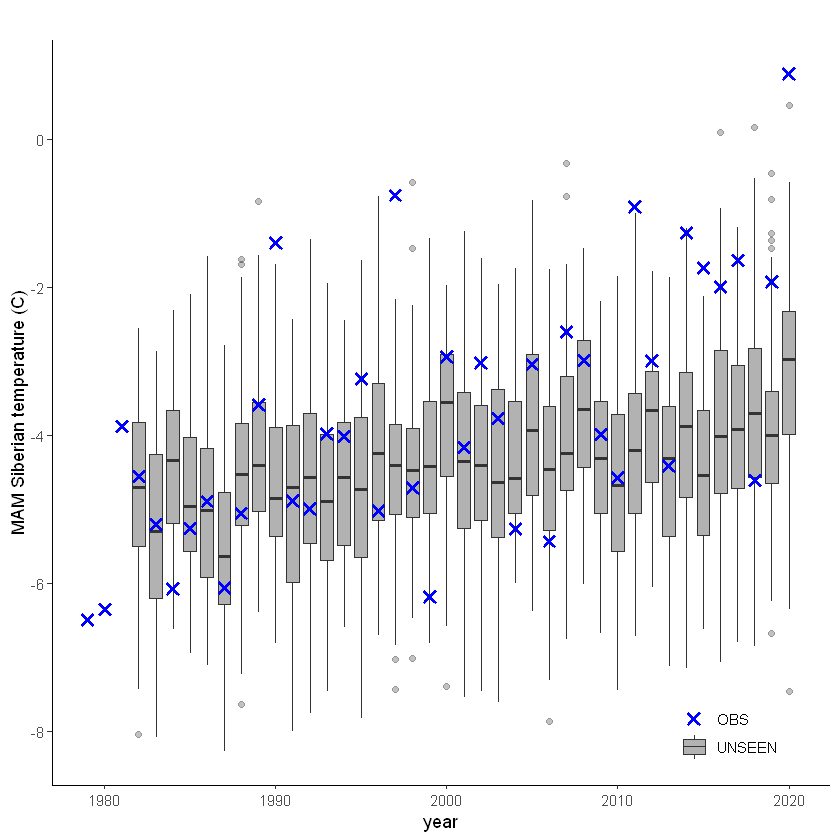

In [10]:
unseen_timeseries(
    ensemble = SEAS5_Siberia_events_zoomed,
    obs = ERA5_Siberia_events_zoomed,
    ensemble_yname = "t2m",
    ensemble_xname = "year",
    obs_yname = "t2m",
    obs_xname = "year",
    ylab = "MAM Siberian temperature (C)")

This shows that there is a temperature trend over the entire domain. Here we will continue with the 'zoomed' domain because it better describes the 2020 event. 

The timeseries consist of hindcast (years 1982-2016) and archived forecasts (years 2017-2020). The datasets are slightly different: the hindcasts contains 25 members whereas operational forecasts contain 51 members, the native resolution is different and the dataset from which the forecasts are initialized is different. 

For the evaluation of the UNSEEN ensemble we want to only use the SEAS5 hindcasts for a consistent dataset. Note, 2017 is not used in either the hindcast nor the operational dataset, since it contains forecasts both initialized in 2016 (hindcast) and 2017 (forecast), see [retrieve](../1.Download/1.Retrieve.ipynb).
We split SEAS5 into hindcast and operational forecasts:

In [24]:
SEAS5_Siberia_events_zoomed_hindcast <- SEAS5_Siberia_events_zoomed[
    SEAS5_Siberia_events_zoomed$year < 2017 &
    SEAS5_Siberia_events_zoomed$number < 25,]

SEAS5_Siberia_events_zoomed_forecasts <- SEAS5_Siberia_events_zoomed[
    SEAS5_Siberia_events_zoomed$year > 2017,]


And we select the same years for ERA5. 

In [32]:
ERA5_Siberia_events_zoomed_hindcast <- ERA5_Siberia_events_zoomed[
    ERA5_Siberia_events_zoomed$year < 2017 &
    ERA5_Siberia_events_zoomed$year > 1981,]

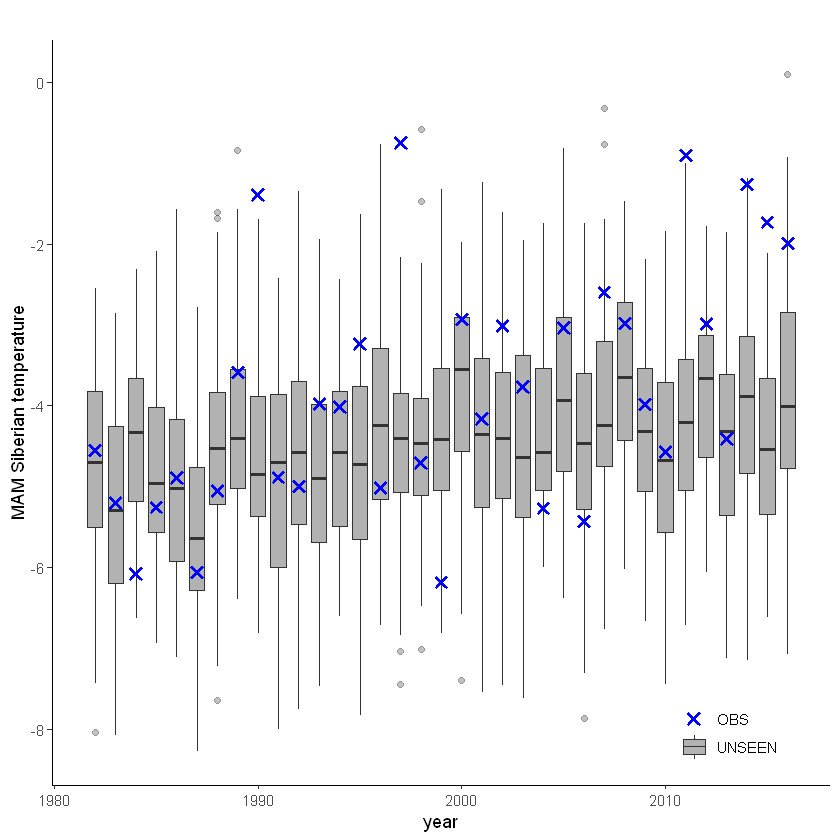

In [33]:
unseen_timeseries(
    ensemble = SEAS5_Siberia_events_zoomed_hindcast,
    obs = ERA5_Siberia_events_zoomed_hindcast,
    ensemble_yname = "t2m",
    ensemble_xname = "year",
    obs_yname = "t2m",
    obs_xname = "year",
    ylab = "MAM Siberian temperature")

 

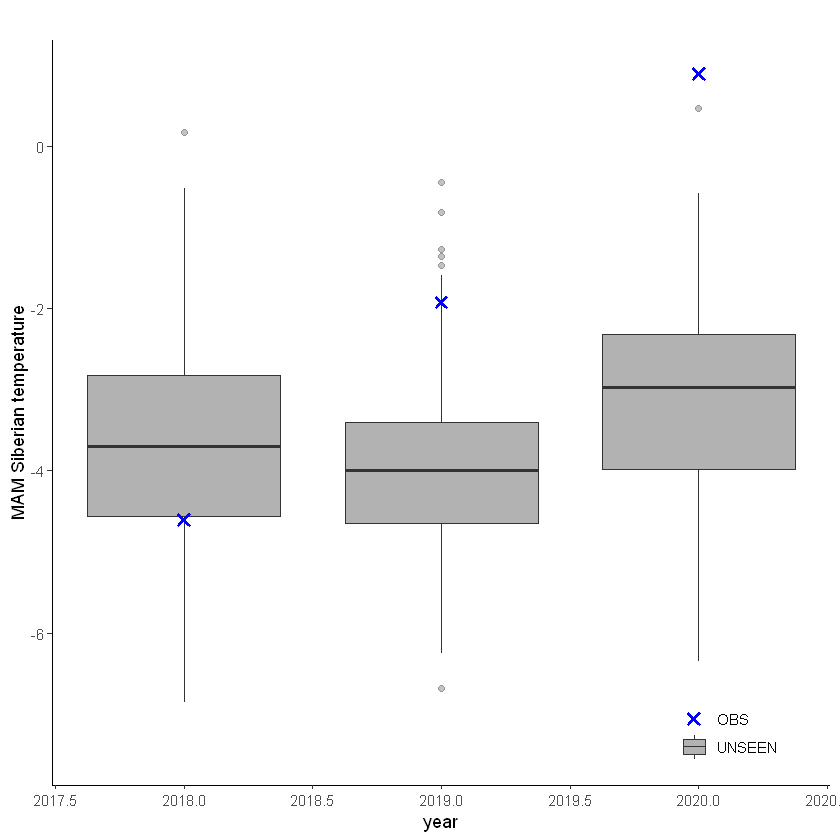

In [26]:
unseen_timeseries(
    ensemble = SEAS5_Siberia_events_zoomed_forecasts,
    obs = ERA5_Siberia_events_zoomed[ERA5_Siberia_events_zoomed$year > 2017,],
    ensemble_yname = "t2m",
    ensemble_xname = "year",
    obs_yname = "t2m",
    obs_xname = "year",
    ylab = "MAM Siberian temperature")

For the UK we have a longer historical record available:

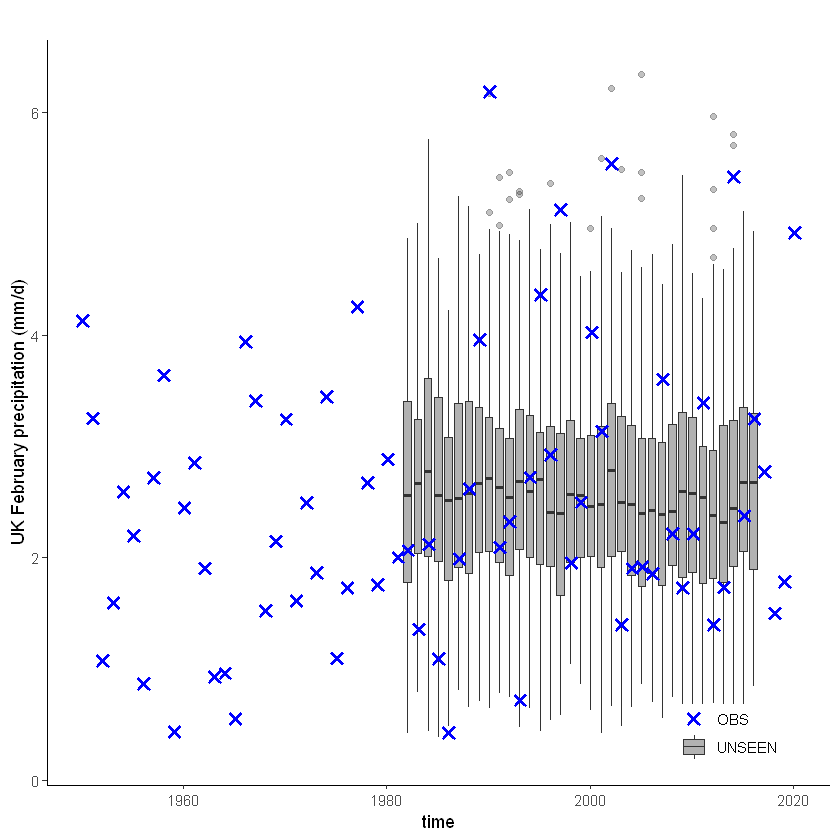

In [12]:
unseen_timeseries(ensemble = SEAS5_UK_weighted_df,
                  obs = EOBS_UK_weighted_df,
                  ylab = 'UK February precipitation (mm/d)')

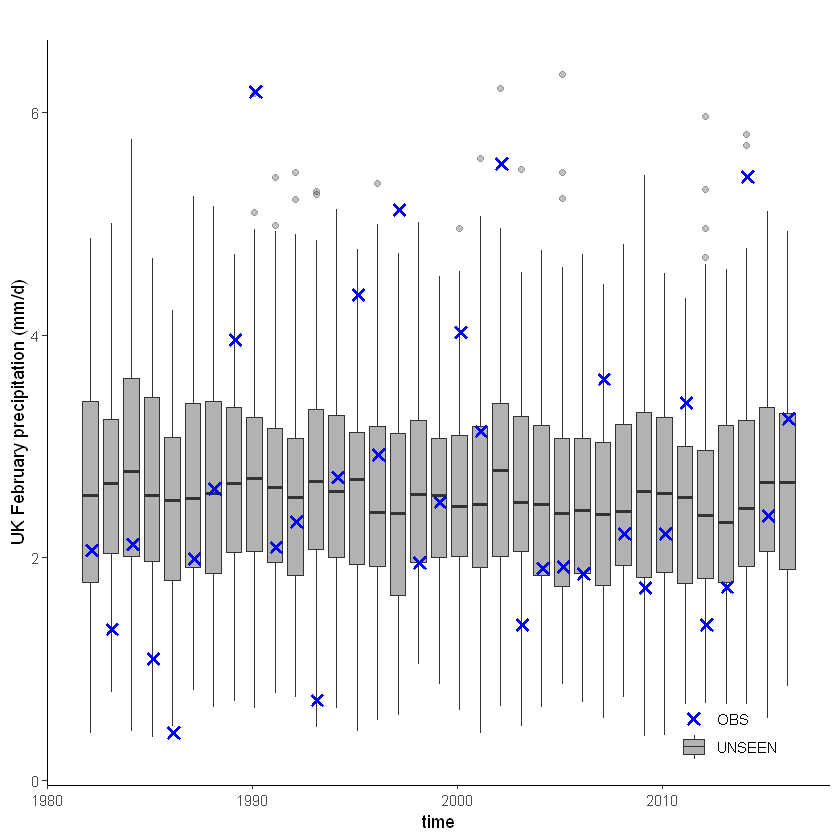

In [38]:
unseen_timeseries(ensemble = SEAS5_UK_weighted_df,
                  obs = EOBS_UK_weighted_df_hindast,
                  ylab = 'UK February precipitation (mm/d)')

Call the documentation of the function with `?unseen_timeseries`

## Independence

Significance ranges need fixing + detrend method (Rob)

Warning message:
"Removed 975 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 975 rows containing non-finite values (stat_boxplot)."


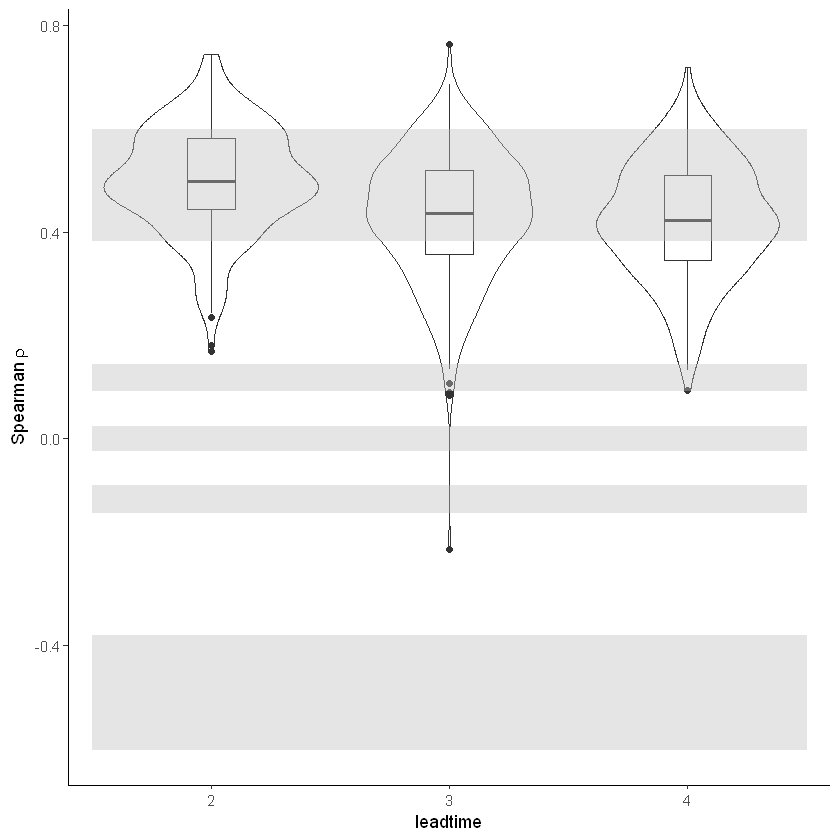

In [14]:
independence_test(
    ensemble = SEAS5_Siberia_events,
    n_lds = 3,
    var_name = "t2m",
)

Warning message:
"Removed 975 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 975 rows containing non-finite values (stat_boxplot)."


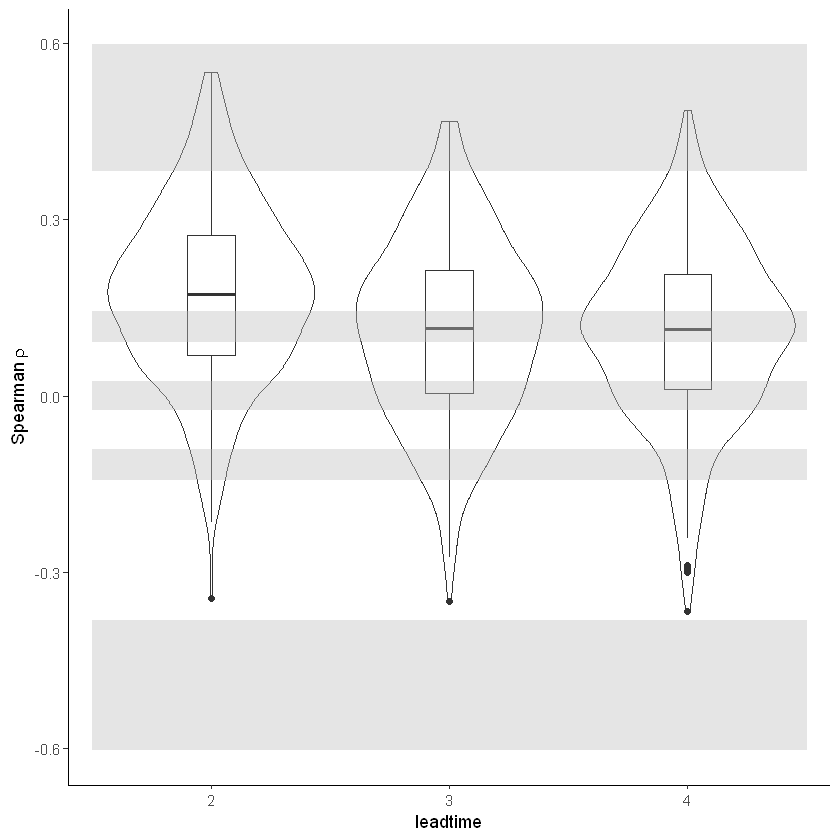

In [15]:
independence_test(
    ensemble = SEAS5_Siberia_events_zoomed,
    n_lds = 3,
    var_name = "t2m",
)

Warning message:
"Removed 1625 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 1625 rows containing non-finite values (stat_boxplot)."


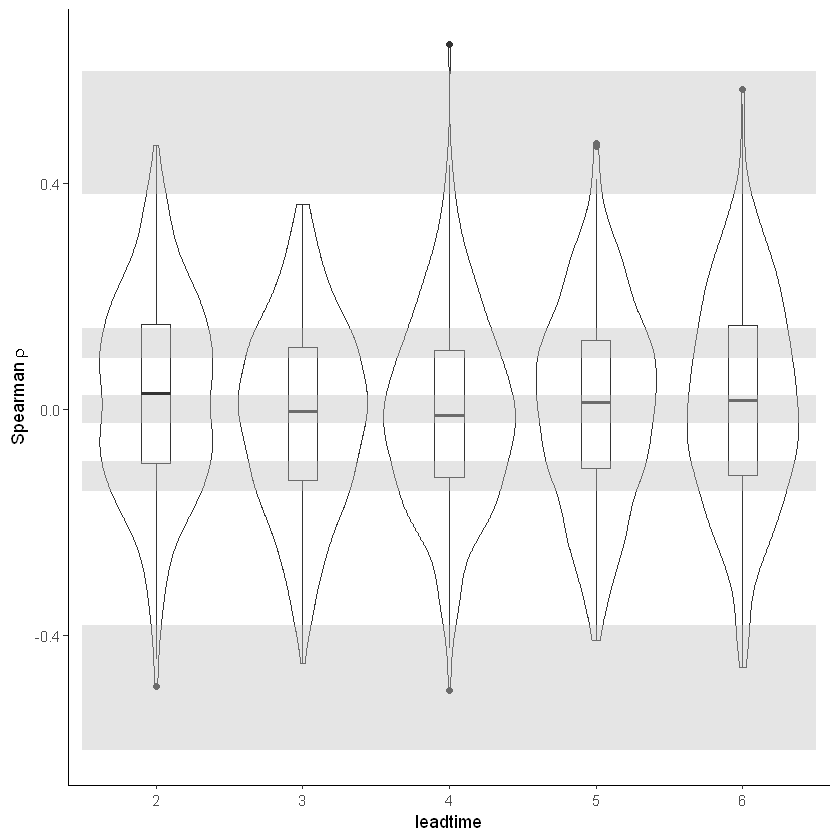

In [16]:
independence_test(ensemble = SEAS5_UK)

## Stability

For the stability test we assess whether the events get more severe with leadtime, due to a potential 'drift' in the model. We need to use the consistent hindcast dataset for this.

Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


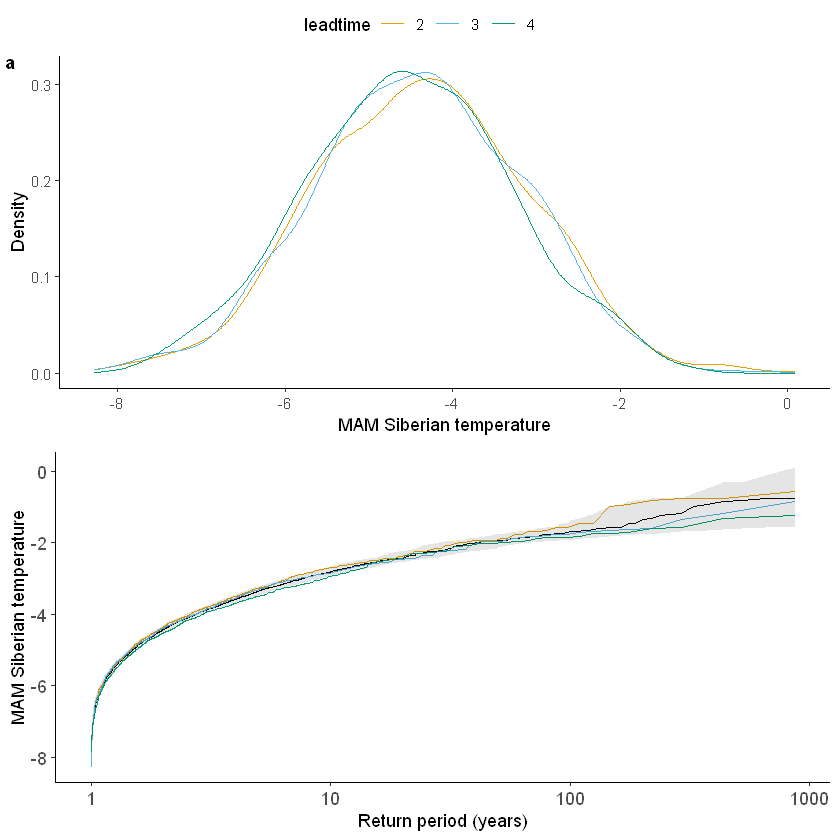

In [27]:
stability_test(
    ensemble = SEAS5_Siberia_events_zoomed_hindcast,
    lab = 'MAM Siberian temperature',
    var_name = 't2m'
)

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


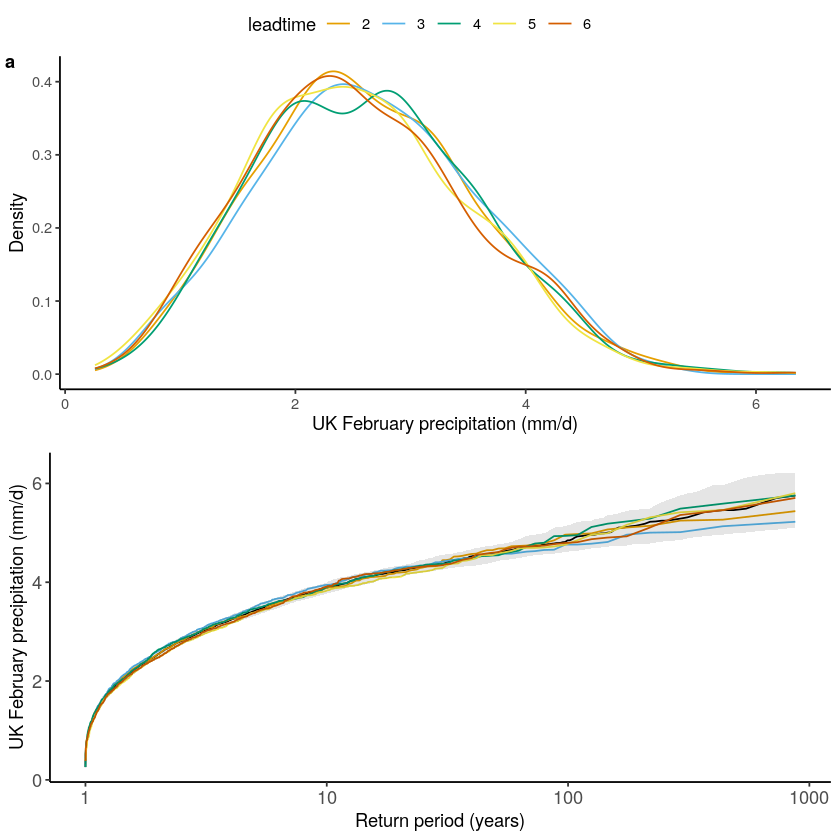

In [8]:
stability_test(ensemble = SEAS5_UK, lab = 'UK February precipitation (mm/d)')

## Fidelity

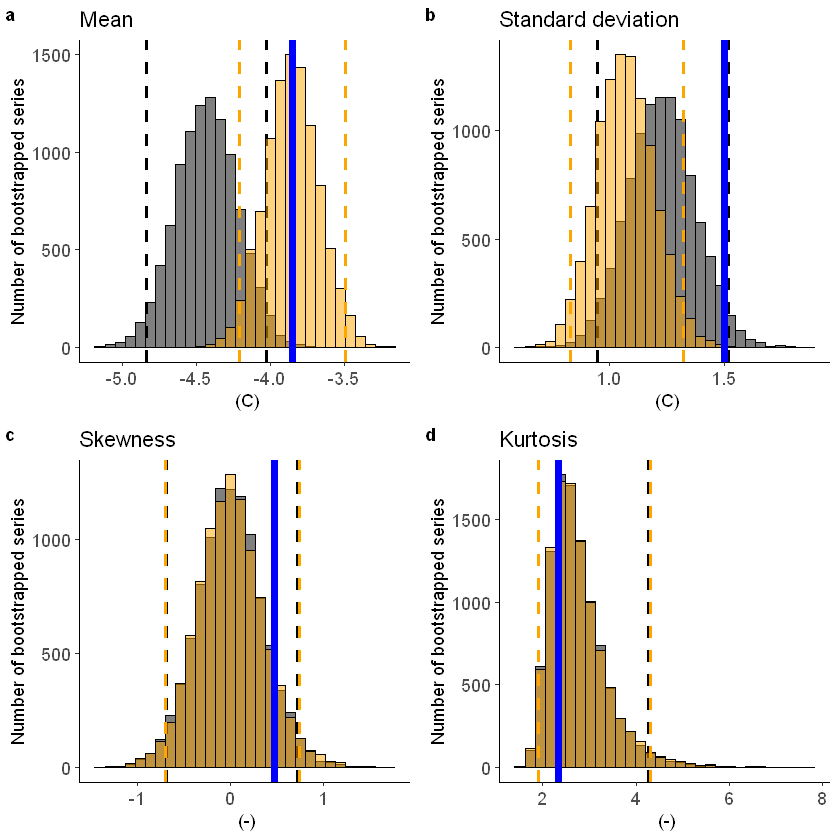

In [36]:
fidelity_test(
    obs = ERA5_Siberia_events_zoomed_hindcast$t2m,
    ensemble = SEAS5_Siberia_events_zoomed_hindcast$t2m,
    units = 'C',
    biascor = TRUE
)

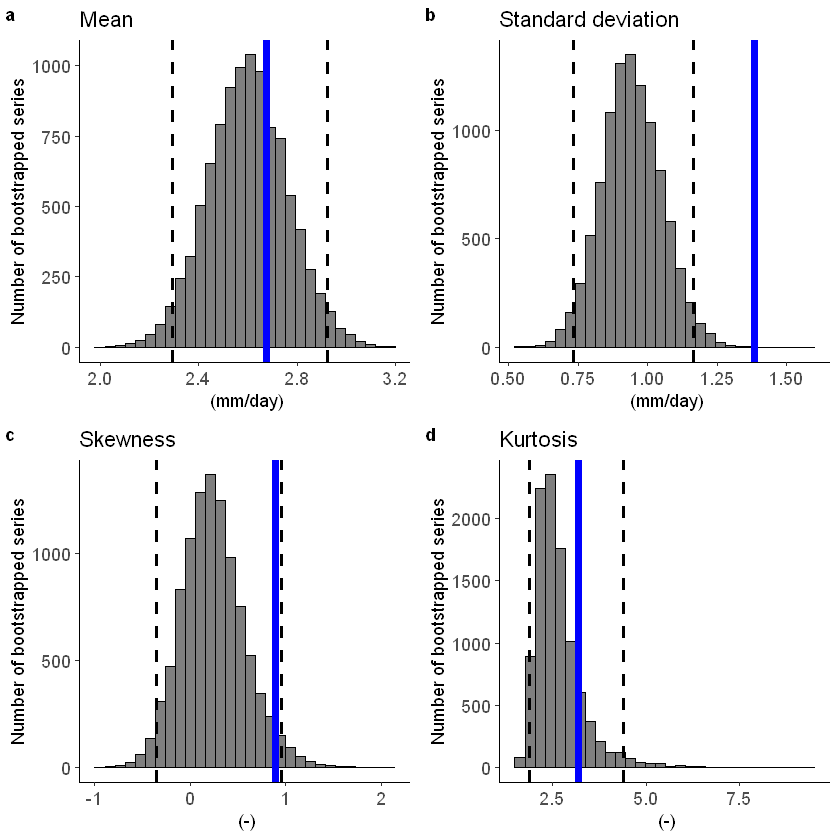

In [39]:
fidelity_test(obs = EOBS_UK_weighted_df_hindast$rr, ensemble = SEAS5_UK$tprate)

To include a mean-bias correction, set `biascor = TRUE`:

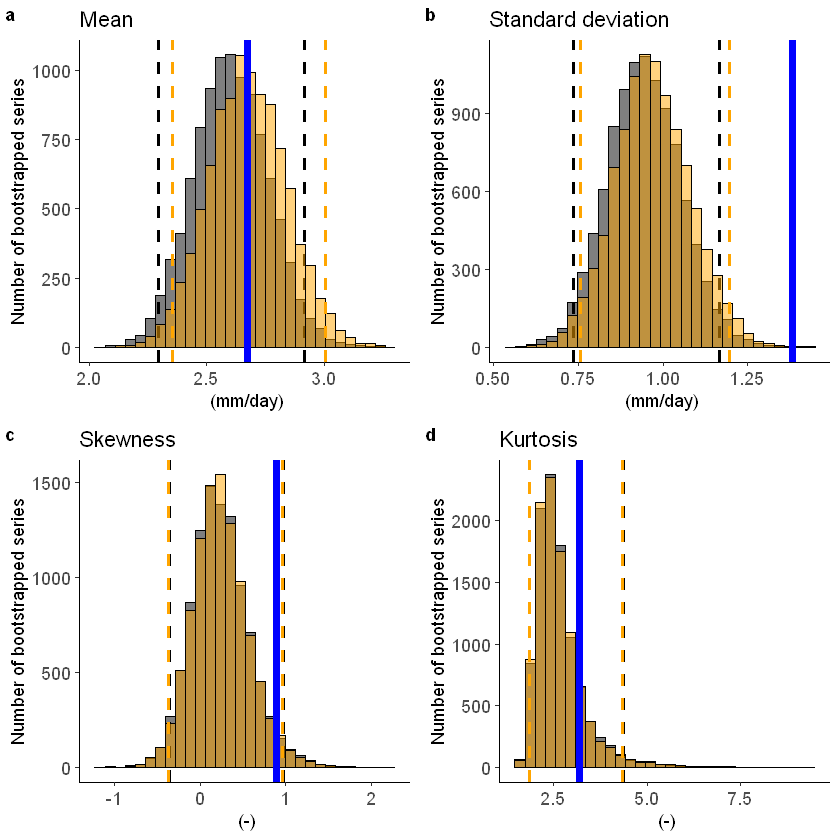

In [40]:
fidelity_test(obs = EOBS_UK_weighted_df_hindast$rr, ensemble = SEAS5_UK$tprate, biascor = TRUE)

In [16]:
?fidelity_test

# Illustrate